In [236]:
'''import sys
!conda install --yes --prefix {sys.prefix} graphviz'''

'import sys\n!conda install --yes --prefix {sys.prefix} graphviz'

In [237]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [276]:
# Load data
path = "Downloads/Customer_Churn.csv"
df = pd.read_csv(path).dropna()
# Transform non numerical column to a numeric variable
df["LEAVE"] = (df.LEAVE == "LEAVE").astype(int) 
df["COLLEGE"] = (df.COLLEGE == "one").astype(int)
df["REPORTED_SATISFACTION"].replace(['very_unsat', 'unsat', 'avg','sat','very_sat'], [0, 1, 2, 3, 4], inplace=True)
df["REPORTED_USAGE_LEVEL"].replace(['very_little', 'little', 'avg','high','very_high'], [0, 1, 2, 3, 4], inplace=True)
df["CONSIDERING_CHANGE_OF_PLAN"].replace(['never_thought', 'no', 'perhaps','considering',
                                          'actively_looking_into_it'], [0, 1, 2, 3, 4], inplace=True)
# Take a look at the data
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,1,1,1,0
1,1,36147,0,13,800586,244,0,6,1,1,3,0
2,1,27273,230,0,305049,201,16,15,1,0,2,0
3,0,120070,38,33,788235,780,3,2,1,4,3,1
4,1,29215,208,85,224784,241,21,1,0,1,0,0


In [239]:
df.shape

(20000, 12)

In [240]:
X = df.drop(['LEAVE'], axis=1)
Y = df['LEAVE']

In [241]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [242]:
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((15000, 11), (5000, 11), (15000,), (5000,))

In [243]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [244]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
classifier.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [245]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array([1, 1, 0, ..., 1, 1, 0])

In [246]:
from sklearn import metrics
print('Criterion entropy accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Test, Y_Pred)) )

Criterion entropy accuracy score = 0.702


In [247]:
Y_pred_train = classifier.predict(X_Train)
print('Criterion entropy accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Train, Y_pred_train)) )

Criterion entropy accuracy score = 0.703


In [248]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2576
           1       0.66      0.79      0.72      2424

    accuracy                           0.70      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.71      0.70      0.70      5000



In [249]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 100)
knnclassifier.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=100)

In [250]:
Y_knn_pred = knnclassifier.predict(X_Test)
print('KNN accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Test, Y_knn_pred)))

KNN accuracy score = 0.684


In [251]:
Y_knn_pred_train = knnclassifier.predict(X_Train)
print('KNN accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Train, Y_knn_pred_train)))

KNN accuracy score = 0.679


In [252]:
'''from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)'''

'from sklearn import tree\ntext_representation = tree.export_text(classifier)\nprint(text_representation)'

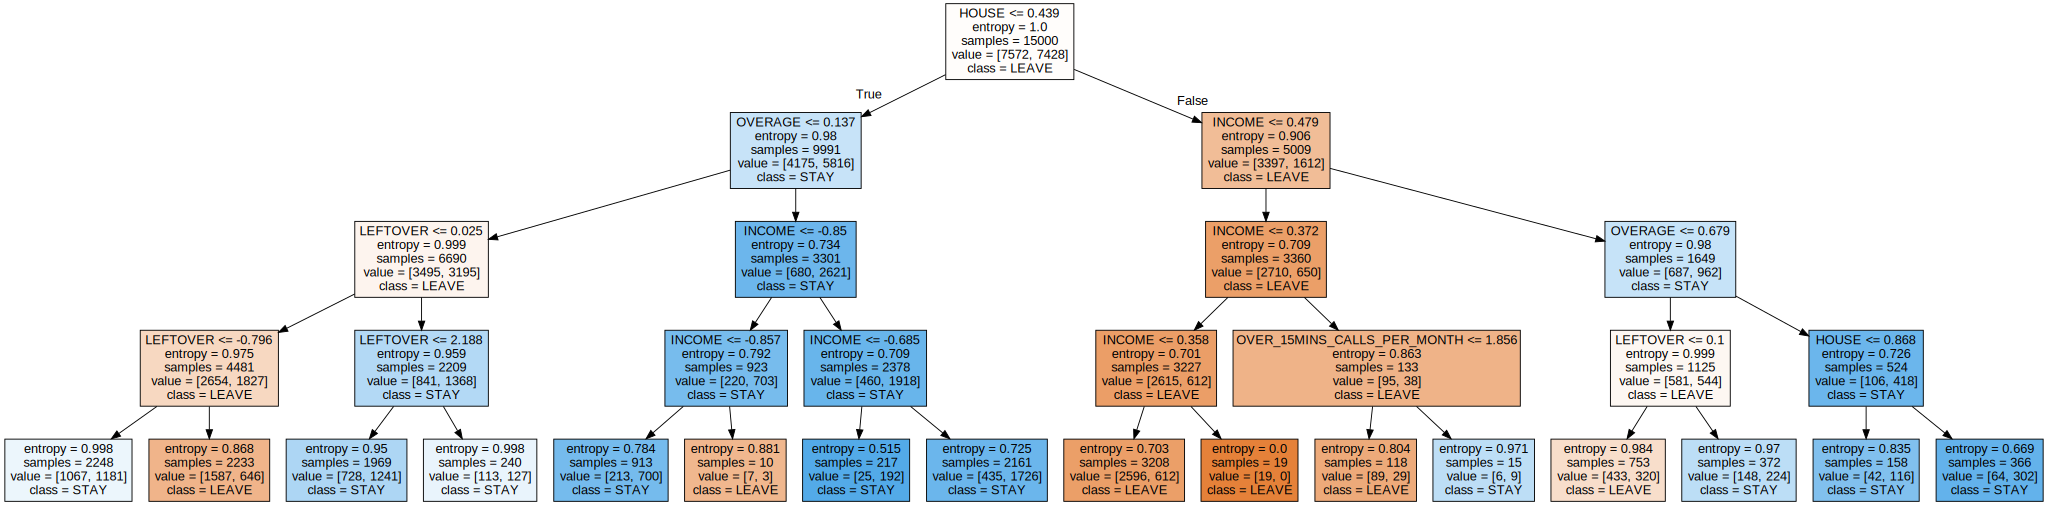

In [281]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=["COLLEGE","INCOME","OVERAGE","LEFTOVER","HOUSE",
                                "HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION",
                                "REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN"],  
                                class_names=["LEAVE","STAY"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

In [260]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
accuracy_score(Y_Test, Y_Pred)

[[1608  968]
 [ 521 1903]]


0.7022

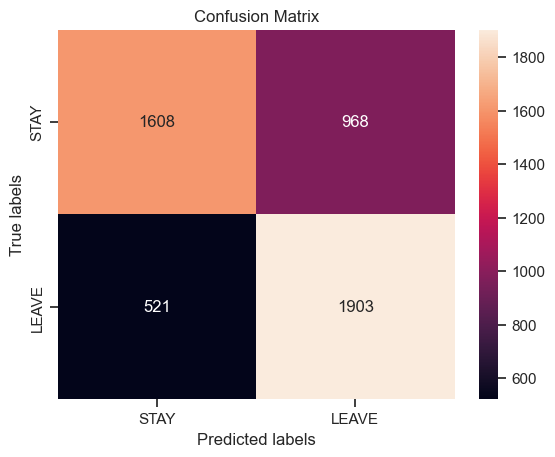

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['STAY', 'LEAVE']); ax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [262]:
kcm = confusion_matrix(Y_Test, Y_knn_pred)
print(kcm)
accuracy_score(Y_Test, Y_knn_pred)

[[1914  662]
 [ 917 1507]]


0.6842

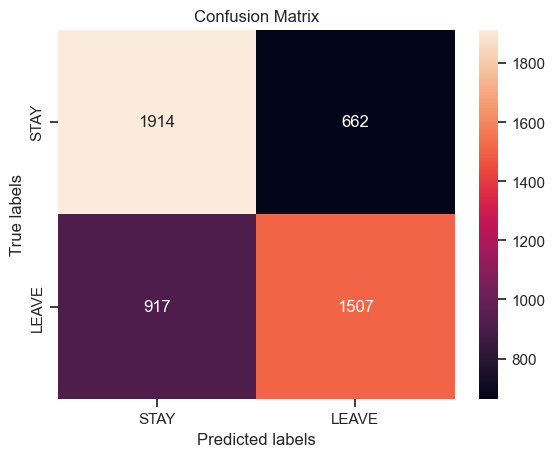

In [274]:
kax= plt.subplot()
sns.heatmap(kcm, annot=True, fmt='g', ax=kax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
kax.set_xlabel('Predicted labels');kax.set_ylabel('True labels'); 
kax.set_title('Confusion Matrix'); 
kax.xaxis.set_ticklabels(['STAY', 'LEAVE']); kax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

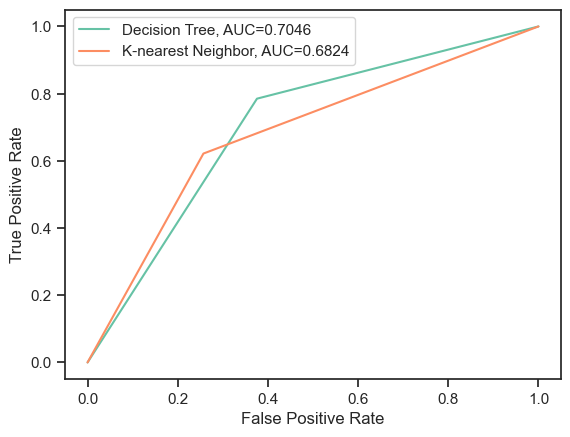

In [279]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = metrics.roc_curve(Y_Test, Y_Pred)
auc = round(metrics.roc_auc_score(Y_Test, Y_Pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, Y_knn_pred)
auc = round(metrics.roc_auc_score(Y_Test, Y_knn_pred), 4)
plt.plot(fpr,tpr,label="K-nearest Neighbor, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()